## Perform Dimension Reduction

In [116]:
## import packages
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import pandas as pd

In [2]:
# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [3]:
# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20181208

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [10]:
import time

In [266]:
digits = load_digits()
digits['DESCR']
## data: array of 1797,64; each element is a pixel array of one number, should be ordered as target
## target: array of 1791,; each element is a target number, order is 0-9
## target_names: array of 10; array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
## images: array of 1797, 8, 8
## DESCR: description

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [35]:

digits.images[1,].shape

(8, 8)

In [268]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
digits.images.shape

(1797, 8, 8)

In [8]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

0
1
2
3
4
5
6
7
8
9


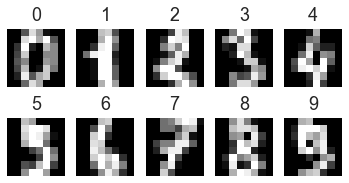

In [6]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    print (i)
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
    
plt.savefig('plots/digits-generated.png', dpi=150)

In [7]:
# We first reorder the data points according to the handwritten numbers.
# this is to make the later color match, nothing to do with the tsne
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)]) ## vertically stack by the order of 0-9
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)]) ## horizontally stack by the order of 0-9

In [8]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
# tsne default
digits_tsne_default = TSNE(random_state=RS, 
                           perplexity=30,
                           learning_rate=200.0,
                           n_iter = 1000).fit_transform(X)

In [115]:
digits_tsne_default.shape

(1797, 2)

In [12]:
# tsne adjust 
start_time= time.time()
digits_tsne_perplexity50 = TSNE(random_state=RS, 
                           perplexity=50,
                           learning_rate=200.0,
                           n_iter = 1000).fit_transform(X)
print("--- %s seconds ---" % (time.time() - start_time))

--- 39.69995093345642 seconds ---


In [13]:
start_time= time.time()
digits_tsne_learningR1000 = TSNE(random_state=RS, 
                           perplexity=30,
                           learning_rate=1000.0,
                           n_iter = 1000).fit_transform(X)
print("--- %s seconds ---" % (time.time() - start_time))

In [65]:
start_time= time.time()
digits_tsne_nIter2000 = TSNE(random_state=RS, 
                           perplexity=30,
                           learning_rate=200.0,
                           n_iter = 2000).fit_transform(X)
print("--- %s seconds ---" % (time.time() - start_time))

--- 64.35742998123169 seconds ---


In [15]:
# PCA default
start_time= time.time()
digits_pca_default = PCA(n_components=2).fit_transform(X)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.06457805633544922 seconds ---


In [264]:
def scatter_noColor(x):
    # We choose a color palette with seaborn.
    #palette = np.array(sns.color_palette("hls", 10)) ## there are 10 numbers, palette is a 10x3 array

    # We create a scatter plot.
    f = plt.figure(figsize=(5, 5))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    #ax.set_xlabel('Component1')
    #ax.set_ylabel('Component2')


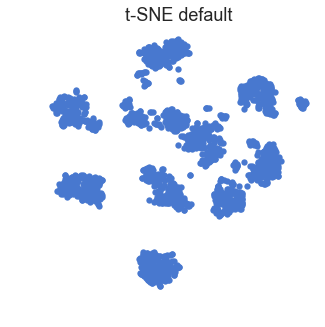

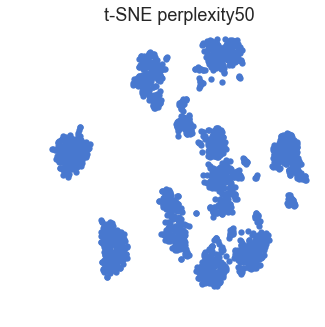

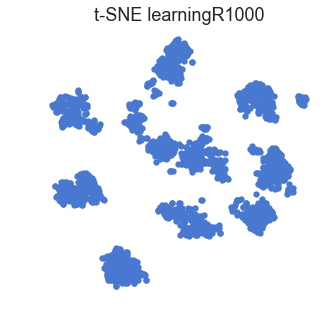

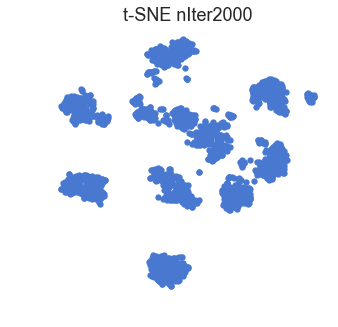

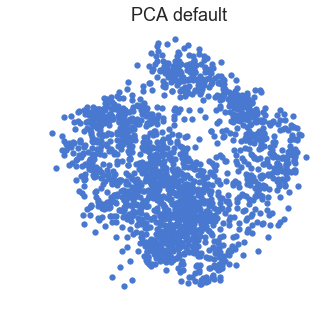

In [265]:
scatter_noColor(digits_tsne_default)
plt.title("t-SNE default")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_default_noColor.png', bbox_inches='tight')

scatter_noColor(digits_tsne_perplexity50)
plt.title("t-SNE perplexity50")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_perplexity50_noColor.png', bbox_inches='tight')

scatter_noColor(digits_tsne_learningR1000)
plt.title("t-SNE learningR1000")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_learningR1000_noColor.png', bbox_inches='tight')

scatter_noColor(digits_tsne_nIter2000)
plt.title("t-SNE nIter2000")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_nIter2000_noColor.png', bbox_inches='tight')

scatter_noColor(digits_pca_default)
plt.title("PCA default")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/PCA_default_noColor.png', bbox_inches='tight')


In [96]:
## below is trying to put all figures together 

def scatter_noColor_all(dfs):
    for idx, file in enumerate(dfs):
        plt.subplot(2,1,idx+1)
        f = plt.figure(figsize=(5, 5))
        ax = plt.subplot(aspect='equal')
        sc = ax.scatter(file[:,0], file[:,1], lw=0, s=40)
        plt.xlim(-25, 25)
        plt.ylim(-25, 25)
        ax.axis('off')
        ax.axis('tight')
    return f

In [219]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10)) ## there are 10 numbers, palette is a 10x3 array

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

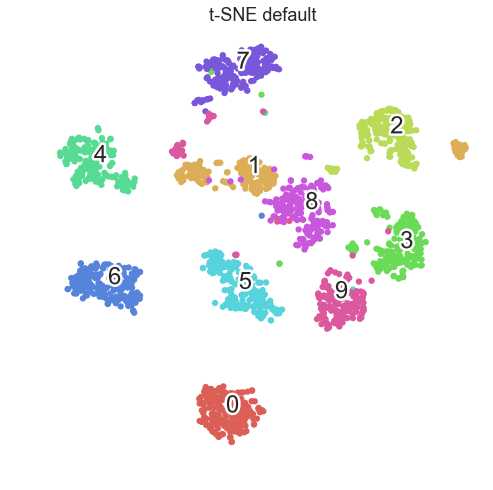

In [269]:
## clusters are very separated
## 1 has multiple subclusters - possibly due to multiple local minima
## https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction
scatter(digits_tsne_default, y)
plt.title("t-SNE default")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_default.png', bbox_inches='tight')



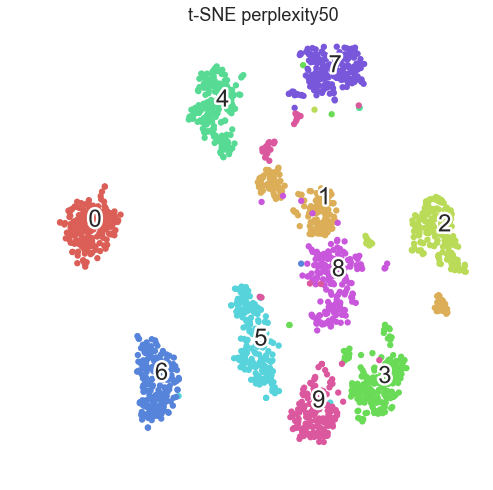

In [270]:
## result with higher perplexity (50 instead of 30)
## similar
scatter(digits_tsne_perplexity50,y)
plt.title("t-SNE perplexity50")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_perplexity50.png', bbox_inches='tight')



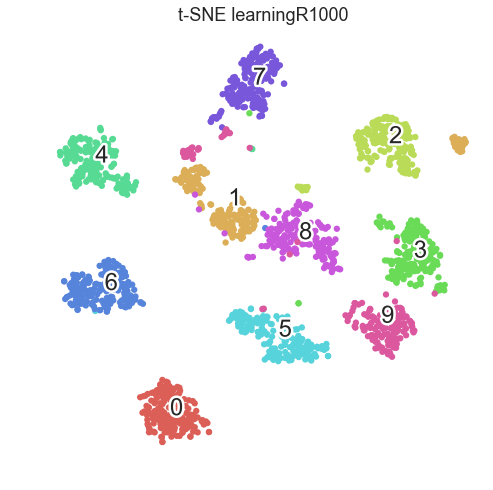

In [271]:
scatter(digits_tsne_learningR1000,y)
plt.title("t-SNE learningR1000")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_learningR1000.png', bbox_inches='tight')




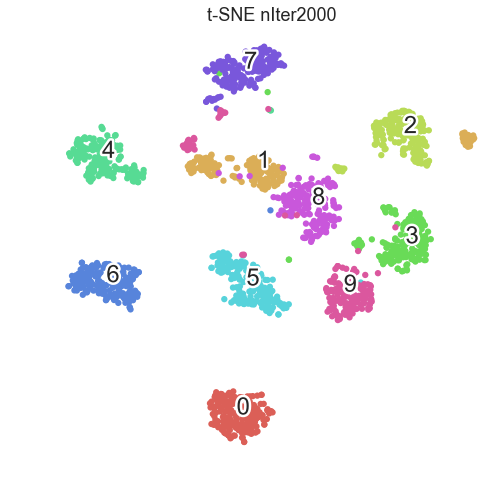

In [272]:
scatter(digits_tsne_nIter2000,y)
plt.title("t-SNE nIter2000")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/tsne_nIter2000.png', bbox_inches='tight')




## PCA

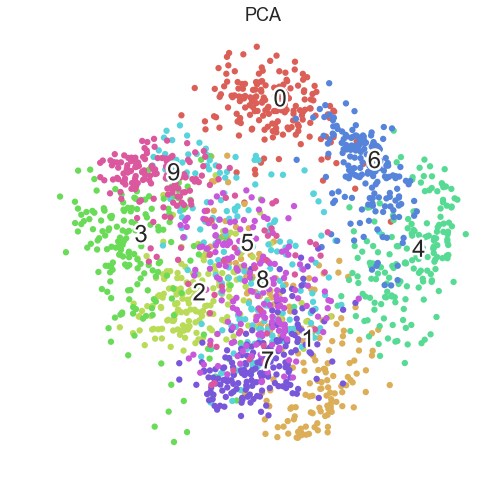

In [273]:
scatter(digits_pca_default, y)
plt.title("PCA")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/PCA_default.png', bbox_inches='tight')



## Perform K-mean cluster

In [22]:
from sklearn.cluster import KMeans

In [106]:
digits_tsne_default_kmean= KMeans(n_clusters=10).fit(digits_tsne_default)
digits_tsne_perplexity50_kmean= KMeans(n_clusters=10).fit(digits_tsne_perplexity50)
digits_tsne_learningRate1000_kmean= KMeans(n_clusters=10).fit(digits_tsne_learningR1000)
digits_tsne_nIter2000_kmean= KMeans(n_clusters=10).fit(digits_tsne_nIter2000)
digits_direct_kmean= KMeans(n_clusters=10).fit(X)
digits_pca_default_kmean= KMeans(n_clusters=10).fit(digits_pca_default)

In [74]:
digits_tsne_default_kmean.labels_[0:1000]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
       0, 4, 4, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [75]:
y[0:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
digits_direct_kmean.labels_

array([0, 0, 0, ..., 8, 8, 8], dtype=int32)

In [27]:
digits_tsne_default_kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
digits_direct_kmean.labels_

array([8, 8, 8, ..., 9, 9, 9], dtype=int32)

## Measure the accuracy of K-Mean prediction with or without t-SNE

In [49]:
def getIncorrectCounts(prediction, label):
    ## get the 10 index range for each number in label
    start_num = label[0]
    start_idx = 0
    idx_range_list = []
    incorrect_sum=0
    for i in range(len(label)):
        if label[i] != start_num:
            #print(y[i])
            end_num = i;
            idx_range = [start_idx, i];
            idx_range_list.append(idx_range);
            start_num = label[i];
            start_idx = i;
        if(i == len(label) - 1):
            idx_range_list.append([start_idx, i]);
            
    ## Split the prediction based on the index range
    labels_list = []
    for i in range(10):
        j = prediction[(idx_range_list[i][0]):(idx_range_list[i][1])]
        labels_list.append(j)
        
    ## for each labels_list, find the majority, 
    ## caculate the total number of incorrect
    incorrect_count_list = []
    for i in range(10):
        incorrect_count = 0
        numbers = labels_list[i]
        counts = np.bincount(numbers)
        majority_num = np.argmax(counts)
        for j in range(len(labels_list[i]-1)):
              if labels_list[i][j] != majority_num:
                      incorrect_count += 1
        incorrect_sum += incorrect_count
        incorrect_count_list.append([i,incorrect_count])
        #print (i)
        #print (incorrect_count)  
    incorrect_count_list.append(["all",incorrect_sum])
    return incorrect_count_list
    
    

In [76]:
digits_tsne_default_kmean_accuracy=getIncorrectCounts(digits_tsne_default_kmean.labels_, y)
digits_direct_kmean_accuracy=getIncorrectCounts(digits_direct_kmean.labels_, y)
digits_tsne_perplexity50_kmean_accuracy=getIncorrectCounts(digits_tsne_perplexity50_kmean.labels_, y)
digits_tsne_learningRate1000_kmean_accuracy = getIncorrectCounts(digits_tsne_learningRate1000_kmean.labels_, y)
digits_tsne_learningRate1000_kmean_accuracy = getIncorrectCounts(digits_tsne_learningRate1000_kmean.labels_, y)
digits_tsne_nIter2000_kmean_accuracy = getIncorrectCounts(digits_tsne_nIter2000_kmean.labels_, y)
digits_pca_default_kmean_accuracy = getIncorrectCounts(digits_pca_default_kmean.labels_, y)

In [241]:
## combine all the inpurity together, for each method, for each number plot inpurity rate bar 

7


In [193]:
df_all_inaccuracy = pd.DataFrame(digits_tsne_default_kmean_accuracy+digits_tsne_perplexity50_kmean_accuracy+
             digits_tsne_learningRate1000_kmean_accuracy+digits_tsne_nIter2000_kmean_accuracy+
             digits_pca_default_kmean_accuracy+digits_direct_kmean_accuracy)
df_all_inaccuracy['method']=method_col
df_all_inaccuracy.columns = ['labels','inaccuracy_count', 'method']
df_all_inaccuracy_copy = df_all_inaccuracy.copy(deep=True)
df_all_inaccuracy_copy
#df_all_inaccuracy.to_csv("df_all_inaccuracy.csv", sep='\t')


In [203]:

pivot_output=df_all_inaccuracy_copy.pivot(index='method', columns='labels', values='inaccuracy_count')
pivot_output=pivot_output.drop(['all'], axis=1)

In [204]:
pivot_output

labels,0,1,2,3,4,5,6,7,8,9
method,,,,,,,,,,
learningRate1000,0,33,10,3,3,2,1,0,3,37
nIter2000,0,37,10,4,3,1,1,0,4,37
no_reduction,1,82,29,27,16,45,4,11,72,41
pca_default,21,95,64,88,31,135,36,63,102,86
perplexity50,0,45,11,4,3,4,1,0,5,37
tsne_default,0,37,10,4,3,1,1,0,4,37


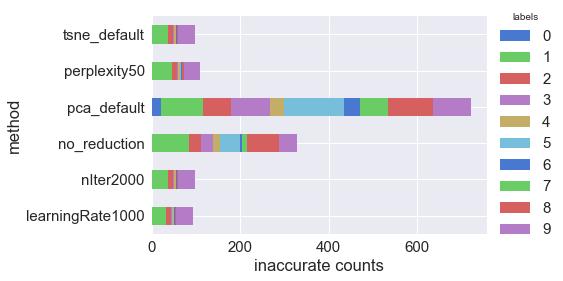

In [216]:
pivot_output.plot.barh(stacked=True)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="labels")
plt.xlabel("inaccurate counts")
plt.savefig('/Users/yanwengong/Documents/fall_2018/math_227A/final_presentation/plots/inacurate_counts_digit.png', bbox_inches='tight')
